# Popular Data Science Questions

## 1.Introduction

In this project we are going to explore **Stack Exchange** (Stack Exchange hosts sites on various fields/subjects. For e.g. mathematics, physics, philosophy and *data science*). Stack Exchange is different than similar other sites as it impliments a *reputation award* system for it's questions and answers. Each question/answer posted is subjected to *upvotes* and *downvotes*. This ensures that good questions/answers are easily identifiable.

Stack Exchange is very relevant to data science as it hosts several data science related sites. Below we list a few of these:-

 - __[Data Science](https://datascience.stackexchange.com/)__
 - __[Cross Validation](https://stats.stackexchange.com/)__
 - __[Artificial Intelligence](https://ai.stackexchange.com/)__
 - __[Mathematics](https://math.stackexchange.com/)__
 - __[Stack Overflow](https://stackoverflow.com/)__ 
 
 
Data Science Stack Exchange (DSSE) is a data science dedicated site and the focus of this project.

**Further we try to comprehend stack exchange by answering some questions about the websites:-**

 - **What kind of questions are welcome on this site?**
   
   Stack Exchange permits high quality questions (& answers) focused on each community's area of expertize. Questions about actual problem faced by one, including details about what one has tried. Stack Exchange discourages questions that are primarily opinion based and/or are likely to generate discussions rather than answers. Question that needs improvement are closed until someone fixes them).
   
  
 - **What, other than questions, does the site's home subdivided into?** 
   
   The home page is subdivided into (other than questions and asnwers) *Tags*, *Users*, *Companies* and *Unanswered Questions*.
   
  - ** Does any of them look useful towards our goal?**
    - *Tags* are useful in understanding the content, as it contains keywords.
    - *Users* is a list of all the users with the details like residing country, badges, reputaion, impact etc. Useful in finding  the top users.
    - *Companies* is a list of companies with details about location, field, working environment etc. It is useful in understanding the work culture of each listed company.
    - *Unanswered questions* is a list of unanswered questions with number of views and votes. 
    
 
 - **What information is available in each post?**
    
    Each post contains *uploaded date*, *modified date*, *views*, *answers if any*, *votes for questions* and *votes for answers*.

`In this project we are going to find the most popular content in DSSE`.

## 2. Exploring the Stack Exchange Data Model

We investigated the *Stack Exchange* data model by writing a few queries on the Stack Exchange Data Explorer (SEDE) database. On the right side of the site there is a list of all the tables and their columns. We can query in the cell given on the left side of the site. Below are the tables we found more promising towards finding the most popular content:-

 - **Posts**:- Posts has columns such as 'Title', 'Tags', 'CreationDate', 'ViewCount', 'FavoriteCount','Score' etc. 'Score', 'ViewCount', and 'FavoriteCount' can help in sorting the most popular content in the field of interest. 
 - **Tags**:- Tags has column 'Count', this can help in sorting the most popular fields. 
 - **Comments**:- Comments section has column 'Score', with this we can see what comments have got highest score.
 
Joining some of the tables together can also help in finding the most popular content. 

## 3. Getting and  Exploring the Data

For our analysis we will consider *posts* table of SEDE DSSE database. The *posts* table has many columns but we are interested in the following columns for our analysis. These are :-

* **Id:** An identification number for the post
* **PostTypeId:** An identification number for the type of post
* **CreationDate:** The date and time of creation of the post
* **Score:** The post's score
* **ViewCount:** How many times the post was viewed
* **Tags:** What tags were used
* **AnswerCount:** How many answers the question got (only applicable to question posts)
* **FavoriteCount:** How many times the question was favoured (only applicable to question posts)

We observe that of last few columns except *Tags*, others contain information about how popular the post is. In here we are focusing our analysis to the posts of 2019.

Above details are stored in a file called `2019_questions.csv`. First we will read the file into a dataframe.

In [1]:
#import all the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

questions_2019 = pd.read_csv('2019_questions.csv', delimiter = ",")
questions_2019

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


The table looks fine. First let us check how many rows are there in the dataset.

In [2]:
questions_2019.shape[0]

8839

There are *8839* rows in the dataset. Let us calculate the number of missing values in each column. 

In [3]:
questions_2019.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

We make the following observation about the data-set:-

* There are *zero* missing values among the columns except for *FavoriteCount* column, where the number of missing values are *7432*. i.e. *~ 84%* of values are missing.    
* It looks difficult to fix the missing value problem as each value corresponds to a unique question.
* We think the number of columns given are adequate for our analysis.
* We can seperate each tag with a comma for every row.

## 4. Cleaning the Data

In this section we will fix previously identified issues with the data. 
- We will fill the missing values with *0*
- We will set each column with appropriate dtype.
  - *Id*, *Score*, *ViewCount*, *AnswerCount*, *FavoriteCount* as `int64`. 
  - *CreationDate* as `datetime64[ns]`
  - *Tags* as `object`
- We will clean the *Tags* column by seperating each tag by a comma using vectorized string methods.

In [4]:
questions_2019 = questions_2019.fillna(0)
questions_2019 = questions_2019.astype({"Id":"int", "Score":"int", "ViewCount":"int", "Tags":"object", "AnswerCount":"int", "FavoriteCount":"int"})
questions_2019["CreationDate"] = pd.to_datetime(questions_2019["CreationDate"])
#Check if the above modifications have been implimented 
questions_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [5]:
#cleaning the Tags column
questions_2019["Tags"] = questions_2019["Tags"].str.replace("<","")
questions_2019["Tags"] = questions_2019["Tags"].str.replace(">"," ")
questions_2019["Tags"] = questions_2019["Tags"].str.split()
questions_2019["Tags"] = [",".join(row) for row in questions_2019["Tags"]]
questions_2019

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0
5,44430,2019-01-23 11:13:32,0,283,fuzzy-logic,1,0
6,44432,2019-01-23 11:17:46,1,214,"time-series,anomaly-detection,online-learning",0,1
7,44436,2019-01-23 12:49:39,0,9,matrix-factorisation,0,0
8,44437,2019-01-23 13:04:11,0,7,"correlation,naive-bayes-classifier",0,0
9,44438,2019-01-23 13:16:29,0,584,"machine-learning,python,deep-learning,keras,cnn",1,0


We have performed required changes to the dataset. 

## 5. Determining the Most Popular Tags

In this section we are going to calculate the most popular tags. For each tag we will calculate *how many times each tag was used* and *how many times each tag was viewed*. 

 - For calculating the *most used Tags*, We will use a function called *Counter*. We will build a dataframe with *Tags* and corresponding *Counts* of the Tags.
 - For calculating *most viewed Tags*, we will create a dictionary with *Tags* as a key and *ViewCount* as it's value. Ultimately, we will build a dataframe with *Tags* and corresponding *ViewCounts*.
 - Lastly, for more clarity we will create graphs for both the datasets.

In [6]:
#import Counter 
from collections import Counter

Tag_list = [item for sublist in questions_2019['Tags'].str.split(',') for item in sublist]
counted_values = Counter(Tag_list) #use counter inorder to count the number of tags

Most_Used = pd.DataFrame(list(counted_values.items()), columns=['Tags', 'Counts'])
Most_Used = Most_Used.sort_values(by = 'Counts', ascending=False)
Most_Used.reset_index(drop=True, inplace=True)
Most_Used

,Tags,Counts
0,machine-learning,2693
1,python,1814
2,deep-learning,1220
3,neural-network,1055
4,keras,935
5,classification,685
6,tensorflow,584
7,scikit-learn,540
8,nlp,493
9,cnn,489


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning:

findfont: Font family ['bold'] not found. Falling back to Bitstream Vera Sans



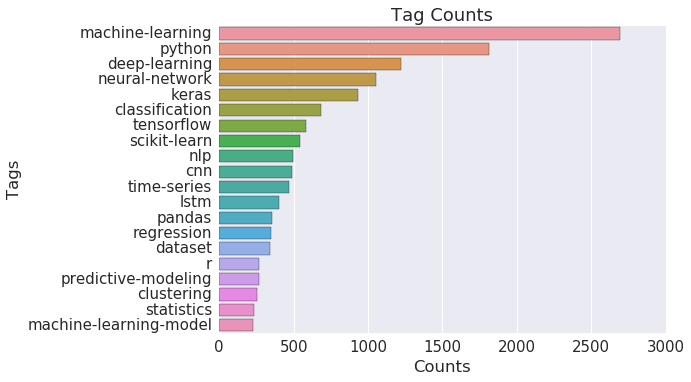

In [7]:
# Visualizing the top 20 most used tags
Most_Used_20 = Most_Used.head(20)
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5,font='bold')
bar_counted = sns.barplot(data=Most_Used_20, y= 'Tags', x= 'Counts', orient='h')
bar_counted.set(ylabel='Tags',xlabel='Counts', title='Tag Counts')
plt.show()

From the above graph we observe that the *most used* top five tags are 

- machine-learning
- python
- deep-learning
- neural-network
- keras 

In [8]:
tag_view_count = {}

for tags, View_Count in zip(questions_2019['Tags'], questions_2019['ViewCount']):
    for tag in tags.split(","):
        tag_view_count[tag] = tag_view_count.get(tag, 0) + View_Count


Most_Viewed = pd.DataFrame.from_dict(data=tag_view_count, orient='index')
Most_Viewed= Most_Viewed.sort_values(by=0, ascending=False)
Most_Viewed = Most_Viewed.reset_index()
Most_Viewed = Most_Viewed.rename(columns={'index':'Tags', 0:'ViewCount'})
Most_Viewed

,Tags,ViewCount
0,python,537585
1,machine-learning,388499
2,keras,268608
3,deep-learning,233628
4,pandas,201787
5,neural-network,185367
6,scikit-learn,128110
7,tensorflow,121369
8,classification,104457
9,dataframe,89352


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



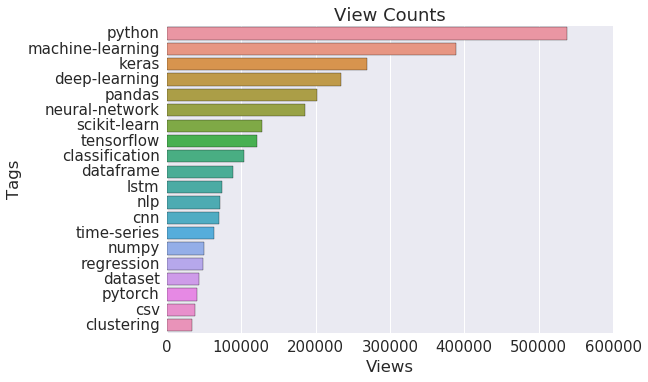

In [9]:
# Visualizing the top 20 most viewed tags
Most_Viewed_20 = Most_Viewed.head(20)
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.5,font='bold')
bar_View = sns.barplot(data=Most_Viewed_20, y= 'Tags', x= 'ViewCount', orient='h')
bar_View.set(ylabel='Tags', xlabel='Views', title='View Counts')
plt.show()

From the above graph we observe that the *most viewed* top five tags are 

- python
- machine-learning
- keras
- deep-learning
- pandas 

### 5.1 Determining the Most Popular Tag-Rows

 In this sub-section, we will find the most popular row of tags.
 
 - For calculating how many times each row (tags) was used, we will use `value_counts()` function on the "Tags" column and convert the table into pandas dataframe. We will name this dataframe `Row_Counts`.
 - For calculating how many times each row (tags) was viewed, we will use `df.pivot_table()` function with "Tags" as 'index', "ViewCount' as 'value' and 'sum' as aggfunc. We will name this table as `Row_Views`.

In [10]:
Row_Counts = questions_2019["Tags"].value_counts()
Row_Counts = pd.DataFrame(data = Row_Counts)
Row_Counts.columns=['Counts']
Row_Counts["Tags"] = Row_Counts.index
Row_Counts = Row_Counts.reset_index(drop=True)
Row_Counts = Row_Counts.reindex(columns=['Tags','Counts'])
Row_Counts

,Tags,Counts
0,machine-learning,118
1,"python,pandas",58
2,python,55
3,r,38
4,tensorflow,36
5,neural-network,35
6,nlp,35
7,reinforcement-learning,32
8,deep-learning,29
9,keras,29


In [11]:
Row_Views = questions_2019.pivot_table(index = "Tags", values='ViewCount', aggfunc='sum')
Row_Views = Row_Views.sort_values(by='ViewCount', ascending=False)
Row_Views["Tags"] = Row_Views.index
Row_Views = Row_Views.reset_index(drop=True)
Row_Views = Row_Views.reindex(columns=['Tags','ViewCount'])
Row_Views

,Tags,ViewCount
0,"python,pandas",62567
1,"machine-learning,neural-network,deep-learning,...",28161
2,"python,dataframe,csv,data-formats",28079
3,"python,pandas,dataframe",15341
4,"machine-learning,python",13324
5,"data-mining,pandas",12847
6,"python,computer-vision,opencv",11323
7,"scikit-learn,pandas,numpy",11136
8,"deep-learning,gpu",10828
9,"machine-learning,deep-learning",10770


Further we are going to create a visualization for the above two tables. We will only consider top 10 rows for this purpose. 

/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning:

findfont: Font family ['bold'] not found. Falling back to Bitstream Vera Sans



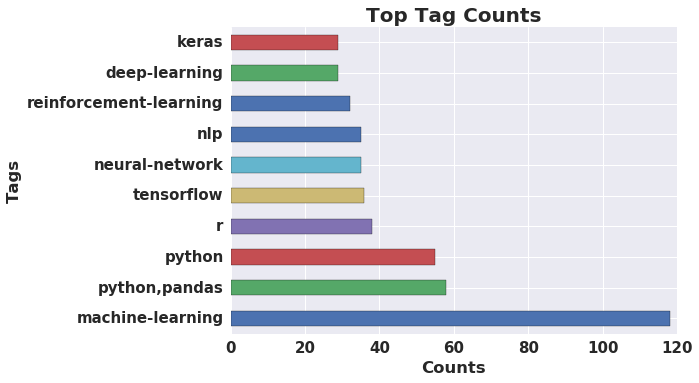

In [12]:
Row_Counts_top10 = Row_Counts.head(10)
Row_Counts_top10.plot.barh(x = "Tags", y = "Counts", legend='')
plt.xlabel('Counts', weight='bold')
plt.ylabel('Tags',weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Top Tag Counts", fontsize=20, weight='bold')
plt.show()

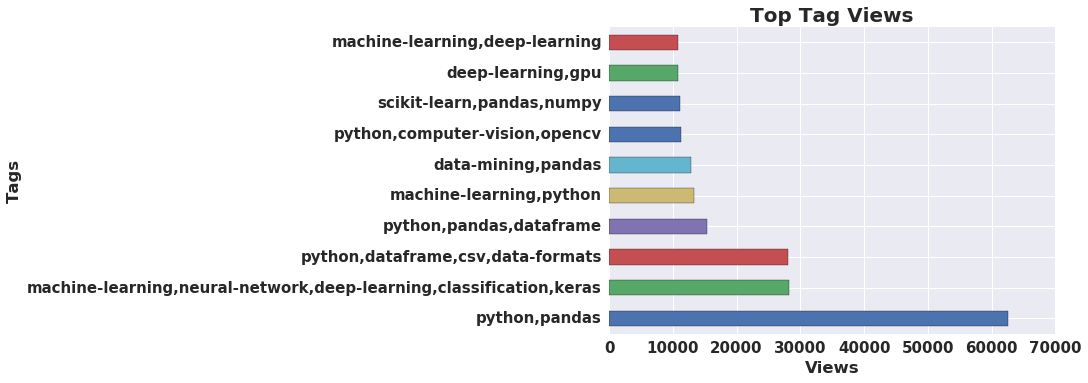

In [13]:
Row_Views_top10 = Row_Views.head(10)
Row_Views_top10.plot(kind = "barh",x = "Tags", y = "ViewCount", legend="")
plt.xlabel('Views', weight='bold')
plt.ylabel('Tags', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title("Top Tag Views", fontsize=20, weight='bold')
plt.show()

From the above two graphs we observe the following:-

 *Top five row-counts are*:- 
 
 - machine-learning
 - python-pandas
 - python
 - r
 - tensorflow
 
 
 *Top five row-views are*:-
 
 - python-pandas
 - machine-learning, neural-network, deep-learning, classification, keras
 - python, dataframe, csv, data-formats
 - python, pandas, dataframe
 - machine-learning, python 

## 6. Relations Between Tags

In this section we will try to find the relationship between *pair of tags* and *multiple tags*. For this purpose we will first merge the two dataframes, *Row_Counts* and *Row_Views* and name this dataframe *merged*. With  the new dataframe we will count the number of tags in each row and store it in a new column called *tag_numbers*.

In [14]:
merged = pd.merge(Row_Counts, Row_Views, how='inner')
merged = merged.sort_values(by='ViewCount', ascending=False).reset_index(drop=True)
merged["tag_numbers"]=merged["Tags"].str.count(",")+1
merged

,Tags,Counts,ViewCount,tag_numbers
0,"python,pandas",58,62567,2
1,"machine-learning,neural-network,deep-learning,...",2,28161,5
2,"python,dataframe,csv,data-formats",1,28079,4
3,"python,pandas,dataframe",22,15341,3
4,"machine-learning,python",23,13324,2
5,"data-mining,pandas",1,12847,2
6,"python,computer-vision,opencv",3,11323,3
7,"scikit-learn,pandas,numpy",1,11136,3
8,"deep-learning,gpu",3,10828,2
9,"machine-learning,deep-learning",18,10770,2


Further, we will segregate the data containing pair of tags and multiple tags (i.e., more than two tags) and arrange them in ascending order of *ViewCount*.

In [15]:
pair_tags = merged[(merged["tag_numbers"]==2) & (merged["Counts"] >= 18)].reset_index(drop=True)
pair_tags

,Tags,Counts,ViewCount,tag_numbers
0,"python,pandas",58,62567,2
1,"machine-learning,python",23,13324,2
2,"machine-learning,deep-learning",18,10770,2
3,"keras,tensorflow",24,6651,2
4,"machine-learning,neural-network",21,4752,2


Above table lists all the pair of tags in the dataset.
Among the pair of tags, the top tags are listed below:-

 - python and pandas
 - machine-learning and python
 - machine-learning and deep-learning
 - keras and tensorflow
 - machine-learning and neural-network

Below we will consider more than 2 tags and find out the top tags.

In [16]:
multiple_tags = merged[(merged["tag_numbers"]>2) & (merged["Counts"] >= 15)].reset_index(drop=True)
multiple_tags

,Tags,Counts,ViewCount,tag_numbers
0,"python,pandas,dataframe",22,15341,3
1,"python,keras,tensorflow",15,2008,3
2,"machine-learning,python,scikit-learn",15,1369,3
3,"machine-learning,neural-network,deep-learning",16,861,3


Above table lists all the threesome tags in the dataset. Below we list top tags:-

 - python, pandas and dataframe
 - python, keras and tensorflow
 - machine-learning, python, scikit-learn
 - machine-learning, neural-network, deep-learning

Further, we will consider more than 3 tags and find out the top tags.

In [17]:
multiple_tags_1 = merged[(merged["tag_numbers"]>3) & (merged["Counts"] >= 4)].reset_index(drop=True)
multiple_tags_1

,Tags,Counts,ViewCount,tag_numbers
0,"python,deep-learning,keras,tensorflow",4,6437,4
1,"machine-learning,neural-network,deep-learning,...",4,2492,4
2,"machine-learning,neural-network,deep-learning,cnn",5,554,4
3,"python,neural-network,deep-learning,keras",4,319,4
4,"machine-learning,python,keras,tensorflow",6,232,4
5,"machine-learning,neural-network,cnn,image-clas...",5,225,4
6,"machine-learning,deep-learning,data-mining,pre...",4,153,5
7,"machine-learning,neural-network,deep-learning,...",4,138,5


From the above table we observe that the most common tags among multiple tags are 
- machine-learning, deep-learning and neural-network along with cnn/keras/image-classification etc.
- python,machine-learning,deep-learning,keras and tensorflow.

## 7. Enter Domain Knowledge

**From our analysis on top tags, we list the most popular tags as below**

 - python
 - machine-learning
 - deep-learning
 - neural-network
 - keras
 - classification
 - tensorflow
 - scikit-learn
 
 
 **In here we will try finding the answers to two important questions**
 
 1. What each of these tags means?
 2. Could there be strong relations betweeen them?

**Let us consider each tag one by one and try answering these questions**

- **Python:** Python is a general purpose, dynamic, strongly typed language with many third party libraries for data science applications.

- **Machine-Learning:** Machine-learning is concerned with the use of data to construct models that have high predictive/forecasting ability. It is often used on large data sets to help draw predictive relationships between underlying features within the data.

- **Neural-Networks:** NN referes to a network or circuit of biological neurons. The modern usage of the term refers to artificial neuron network (ANN). This is composed of artificial neurons or nodes - programming constructs that mimic the properties of biological neurons. A set of weighted connections between the neurons allows information to propogate through the network to solve artificial intelligence problems without the network designer having a model of real system. The goal is human like predictive ability.

- **Deep Learning:** Deep learning is an area of machine-learning which attempts to build neural-networks to learn complex functions by using special artitechtures composed of many layers. Deep architechtures allow more complex tasks to be learned. Deep-learning was introduced into machine-learning research with the intention of moving machine-learning closer to artificial-intelligence. 

- **TensorFlow:** TensorFlow is an open source library for machine-learning. It provides a Python API for building and executing data flow graphs. 

- **Keras:** Keras is a popular, open-source deep learning API for Python built on top of TensorFlow and is useful for fast implementation.

- **Classification:** In machine learning and statistics, classification refers to the problem of predicting category memberships based  on a set of pre-labeled examples. It is a type of `supervised learning`. Some of the most important classification algorithms are support vector machines, logistic regression, naive Bayes, random-forest and artificial neural networks. When we wish to associate inputs with continuous values in a supervised framework, the problem is known as `regression`. The unsupervised counterpart to classification is known as `clustering` and involves grouping data into categories based on some measure of inherent similarity.

- ** Scikit-Learn:** It is a popular machine-learning package for Python that has simple and efficient tools for predicting data-analysis. Topics include classification, regression, clustering, dimensionality reduction, model selection and preprocessing. It is built upon NumPy, SciPy and Matplotlib.

 From the definition, we can assess a strong relations between these tags. All the tags mentined here, are useful in the field of data science. *Python* is  the most popular programming language in the field of data science. It has many libraries which are useful in analysing the data. *Machine-Learning* algorithms are applied on huge data-sets inorder to build models and predict future trends. From the above definition we can understand that *deep-learning* was introduced in *machine-learning* with the intention of moving machine-learning closer to *artificial intelligence* (artificial neural network). *TensorFlow* enables python to create data flow graphs, whereas *Keras* (which is built on top of TensorFlow) enables python to create deep-learning models. *Classification* is related to machine-learning and *Scikit-Learn* is a popular machine-learning, python package for predicting data-analysis.

## 8. Is Deep Learning Just a Fad?

In the above section we found tha `deep-learning` is one of the most popular tags. In this section we are going to solidify our findings by verifying *If the deep-learning is just a fad*. As our goal in here is to figure out if the deep learning is slowing down!

We have a csv file with all the questions ever asked on DSSE. Their *Tags*, *Dateof Creation*, and *Ids*.

In here we will adress the following queries:

 - Number of total amount of questions asked per time period
 - Number of deep learning questions asked per time period
 - Relative number of deep learning question compared to total amount of questions per time period

In [18]:
#read in the file with the required information
posts = pd.read_csv('all_questions.csv')
posts

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
5,45428,2019-02-12 05:43:18,<cnn>
6,45430,2019-02-12 06:20:30,<machine-learning><learning>
7,45431,2019-02-12 07:26:56,<machine-learning>
8,45433,2019-02-12 08:56:23,<python><keras><tensorflow><lstm>
9,45434,2019-02-12 09:09:01,<neural-network><feature-selection><mlp>


Let us transform the *Tags* column likewise section 4. We follow the same method.

In [19]:
posts["Tags"] = posts["Tags"].str.replace("<","")
posts["Tags"] = posts["Tags"].str.replace(">"," ")
posts["Tags"] = posts["Tags"].str.split()
posts["Tags"] = [",".join(row) for row in posts["Tags"]]
posts

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability"
1,45418,2019-02-12 00:50:39,neural-network
2,45422,2019-02-12 04:40:51,"python,ibm-watson,chatbot"
3,45426,2019-02-12 04:51:49,keras
4,45427,2019-02-12 05:08:24,"r,predictive-modeling,machine-learning-model,s..."
5,45428,2019-02-12 05:43:18,cnn
6,45430,2019-02-12 06:20:30,"machine-learning,learning"
7,45431,2019-02-12 07:26:56,machine-learning
8,45433,2019-02-12 08:56:23,"python,keras,tensorflow,lstm"
9,45434,2019-02-12 09:09:01,"neural-network,feature-selection,mlp"


We have succesfully tranformed the table. To perform our analysis we have to convert the *CreationDate* column to `datetime` object. We will consider a time-period of *1 year (12 months)* as it appears more appropriate to cover six years ( 2014 - 2020) else the table might get lengthier. We will apply pandas *Grouper* function in order to calculate the query counts.

First we will perform the analysis on all the *Tags*. Then we will consider the *Tags* with *deep-learning*.

In [20]:
#all tags per time period
posts['CreationDate'] = pd.to_datetime(posts['CreationDate'])
posts_count_per_year = posts.groupby(pd.Grouper(key='CreationDate', freq='12M')).size().reset_index(name='count_total')
posts_count_per_year

,CreationDate,count_total
0,2014-05-31,58
1,2015-05-31,857
2,2016-05-31,1675
3,2017-05-31,2376
4,2018-05-31,4120
5,2019-05-31,6783
6,2020-05-31,5707


We classify following Tags as relevant to deep-learning.

 - neural-network
 - classification
 - tensorflow
 - keras
 - scikit-learn
 - nlp
 - pytorch
 - theano
 - cnn
 - rnn
 - lstm
 
Above listed Tags are used for deep-learning applications. As *python* and *machine-learning* are used for other than deep-learning applications, we will not include them in our analysis.

In [21]:
#deep-learning tags per time period
deep_learning_posts = posts[posts["Tags"].str.contains('deep-learning|neural-network|classification|tensorflow|keras|scikit-learn|nlp|pytorch|theano|cnn|rnn|lstm')]
deep_learning_posts = deep_learning_posts.reset_index(drop=True)
deep_learning_posts

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"python,keras,tensorflow,cnn,probability"
1,45418,2019-02-12 00:50:39,neural-network
2,45426,2019-02-12 04:51:49,keras
3,45428,2019-02-12 05:43:18,cnn
4,45433,2019-02-12 08:56:23,"python,keras,tensorflow,lstm"
5,45434,2019-02-12 09:09:01,"neural-network,feature-selection,mlp"
6,45437,2019-02-12 09:47:13,"python,classification,keras"
7,45438,2019-02-12 09:59:33,"python,neural-network"
8,45442,2019-02-12 11:35:56,"python,neural-network,deep-learning,keras"
9,45443,2019-02-12 11:36:15,"python,scikit-learn,random-forest"


In [22]:
deep_count_per_year = deep_learning_posts.groupby(pd.Grouper(key='CreationDate', freq='12M')).size().reset_index(name='count_dl')
deep_count_per_year

,CreationDate,count_dl
0,2014-05-31,7
1,2015-05-31,224
2,2016-05-31,577
3,2017-05-31,1049
4,2018-05-31,2134
5,2019-05-31,3554
6,2020-05-31,2948


Further we will club both the tables for comparison purposes using pandas *merge* function. In order to find the relative difference between the two queries, we substract the *count_dl* from the *count_total*. 

In [23]:
combined_data = pd.merge(posts_count_per_year, deep_count_per_year, how='inner')
combined_data['Relative_diff'] = round(((combined_data['count_total'] - combined_data['count_dl'])), 2)
combined_data['CreationDate'] = combined_data['CreationDate'].dt.year
combined_data

,CreationDate,count_total,count_dl,Relative_diff
0,2014,58,7,51
1,2015,857,224,633
2,2016,1675,577,1098
3,2017,2376,1049,1327
4,2018,4120,2134,1986
5,2019,6783,3554,3229
6,2020,5707,2948,2759


Above table summarises answers to all our queries raised at the beginning of this section. It has *total amount of questions asked per time period*, *number of deep-learning questions asked per time-period* and *relative difference between total number of questions asked and deep-learning questions* (these represent the other querries asked except deep-learning). 
From the table we can observe that the relative difference is very high during the first four years, in the fifth year this difference narrows down considerably. In the latest years the deep-learning queries are more compared to other queries. Below we will visualize this difference. For this reason we will plot two graphs, a simple line-plot and a bar plot.

In [24]:
#Modify the dataset by dropping the count_total column and setting
#CreationDate as index
combined_data.set_index('CreationDate',inplace=True)
combined_data.drop(columns='count_total', inplace=True)
combined_data = combined_data.rename(columns={'count_dl':'deep learning', 'Relative_diff':'others'})
combined_data

,deep learning,others
CreationDate,,
2014,7,51
2015,224,633
2016,577,1098
2017,1049,1327
2018,2134,1986
2019,3554,3229
2020,2948,2759


/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning:

findfont: Font family ['bold'] not found. Falling back to Bitstream Vera Sans



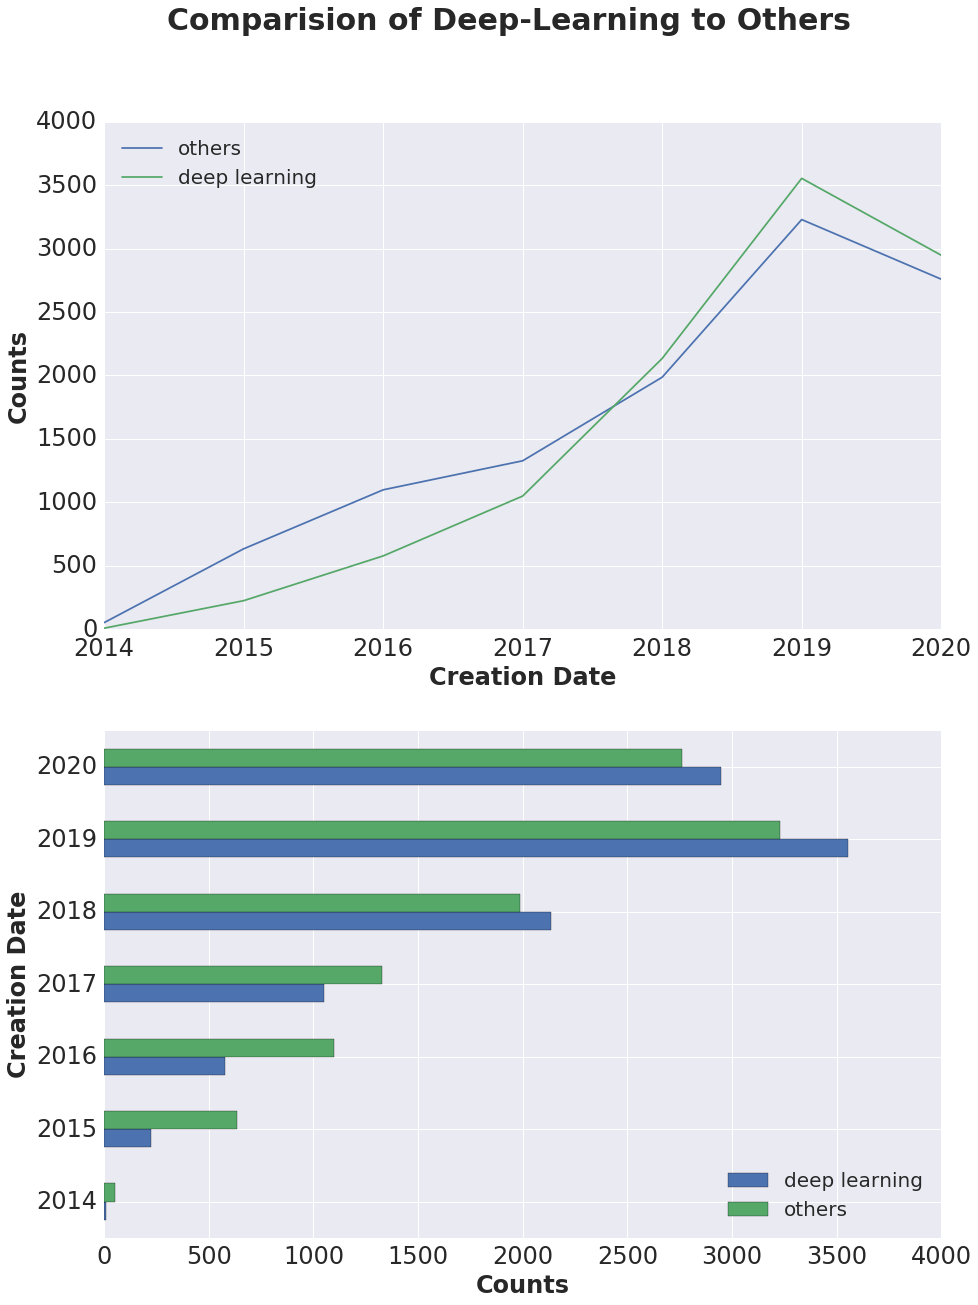

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,20))
fig.suptitle('Comparision of Deep-Learning to Others', fontsize=30, weight='bold')
combined_data.plot.barh(ax=ax2)
ax2.legend(loc='lower right', fontsize=20)
ax2.set_ylabel('Creation Date',fontsize=24, weight='bold')
ax2.set_xlabel('Counts',fontsize=24, weight='bold')
ax2.tick_params(axis='both', labelsize=24)

ax1.plot(combined_data['others'])
ax1.plot(combined_data['deep learning'])
ax1.set_xticklabels(combined_data.index.values)
ax1.legend(loc='upper left',fontsize=20)
ax1.set_xlabel('Creation Date',fontsize=24, weight='bold')
ax1.set_ylabel('Counts',fontsize=24, weight='bold')
ax1.tick_params(axis='both', labelsize=24)
plt.show()

These graphss are better guide to the eyes. The result is clear in both the plots. In the years *2014*, *2015*, *2016* and *2017* there are more counts for others compared to deep-learning. We see a cross-over somewhere between *2017* and *2018* in the line-plot. From the year *2018* we see more counts for deep-learning compared to others in both bar and line plots.

### Recommendation About Other Non-Popular Tags 

From section 6 of our project we observe that *pandas and dataframe* is one of the leading topics which is not as popular as machine-learning and deep-learning.

## Conclusions

In this project we explored *Stack Exchange* (question and answer  network website) which hosts many data science related sites. Data Science Stack Exchange (DSSE) is a data science dedicated site and focus of this project. Objective of this project is to find the most popular topics among DSSE.

For our analysis, we considered *posts table* of 2019 DSSE database. We considered 7 columns of the data-set. These are *Id*, *CreationDate*, *Score*, *ViewCount*, *Tags*, *AnswerCount*, and *FavoriteCount*. 

After cleaning the dataset, we performed following analysis:-

 * **We calculated *Most Used Tags* and *Most Viwed Tags*.**
 
 The most used top 5 tags are:  
    1. Machine-learning
    2. Python
    3. Deep-learning
    4. Neural-network
    5. Keras
    
 The most viewed top 5 tags are:
    1. Python
    2. Machine-learning
    3. Keras
    4. Deep-learning
    5. Pandas
    
    
 * **We examined the relationship between *pair of tags* and *multiple tags*.**
 
 Among pair of tags the most popular ones are:
  1. Python and Pandas
  2. Machine-learning with python/deep-learning/neural-network
  3. Keras and Tensorflow
  
 Among threesome tags the most popular ones are:
  1. Python with pandas & dataFrame/keras & tensorflow/machine-learning & scikit-learn
  2. Machine-learning, deep-learning & tensor-flow
  
 Among multiple tags the most popular ones are:
  1. machine-learning, deep-learning, neural-network with cnn/keras/classification etc.
  2. python, machine-learning, deep-learning, keras & tensor-flow
  
  
 * **From our analysis of `most used` and `most viewed` tags, we list following tags as the most popular ones.**
  1. Python
  2. Machine-learning
  3. Deep-learning
  4. Neural-network
  5. Keras
  6. Classification
  7. Tensor-flow
  8. Scikit-learn
  
  
 * Lastly, our analysis lead to the conclusion that deep-learning has been the most popular topic in the field of data science in recent years. 